In [9]:
import cv2
from skimage import io
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

path = "exam_sheets/scan0001.jpg"
width= 1162
height = 2000


image = cv2.imread(path)
img = cv2.resize(image, (width, height))
imgCvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


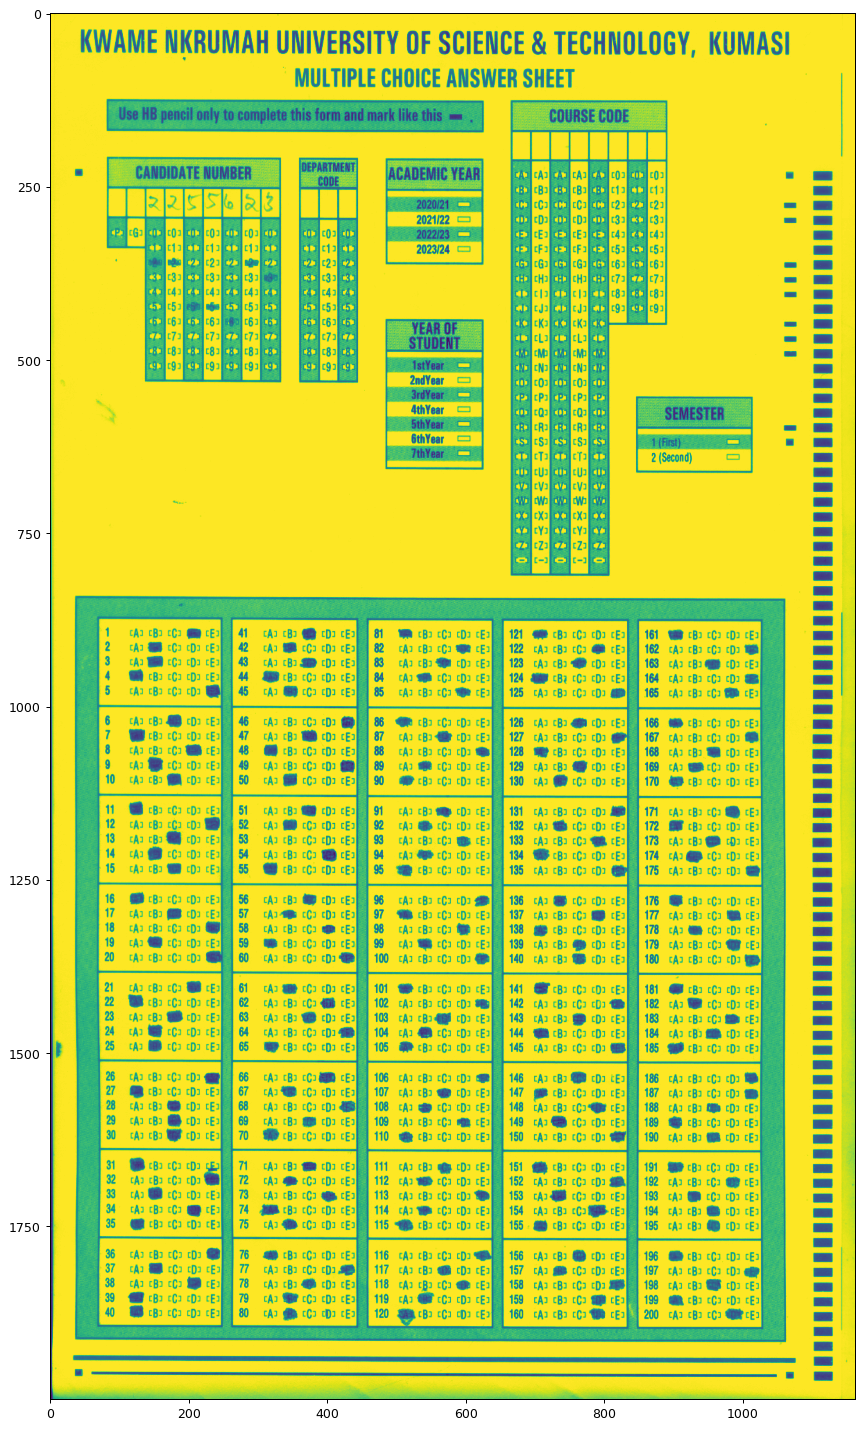

In [10]:
# Graying the image
grayImg = cv2.cvtColor(imgCvt, cv2.COLOR_BGR2GRAY)
figure(figsize=(20, 20), dpi=90)
plt.imshow(grayImg)

In [11]:
# alpha = 1.7  # Contrast control (1.0-3.0)
# beta = 0    # Brightness control (0-100)
# img = cv2.convertScaleAbs(imgBigContour, alpha=alpha, beta=beta)



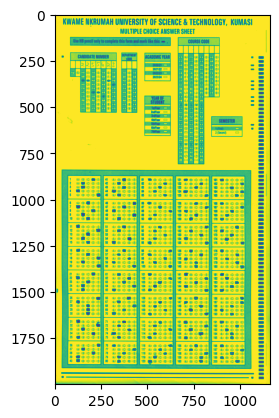

In [12]:
imgBlur = cv2.GaussianBlur(grayImg, (3, 3), 0)
Canny_img = cv2.Canny(imgBlur, 75, 220)
# plt.imshow(img)

# find contours in the thresholded image, then initialize
# the list of contours that correspond to questions
cnts = cv2.findContours(Canny_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgBigContour = grayImg.copy()
# cv2.drawContours(imgBigContour, cnts, -1, (0, 255, 0), 10)
plt.imshow(imgBigContour)


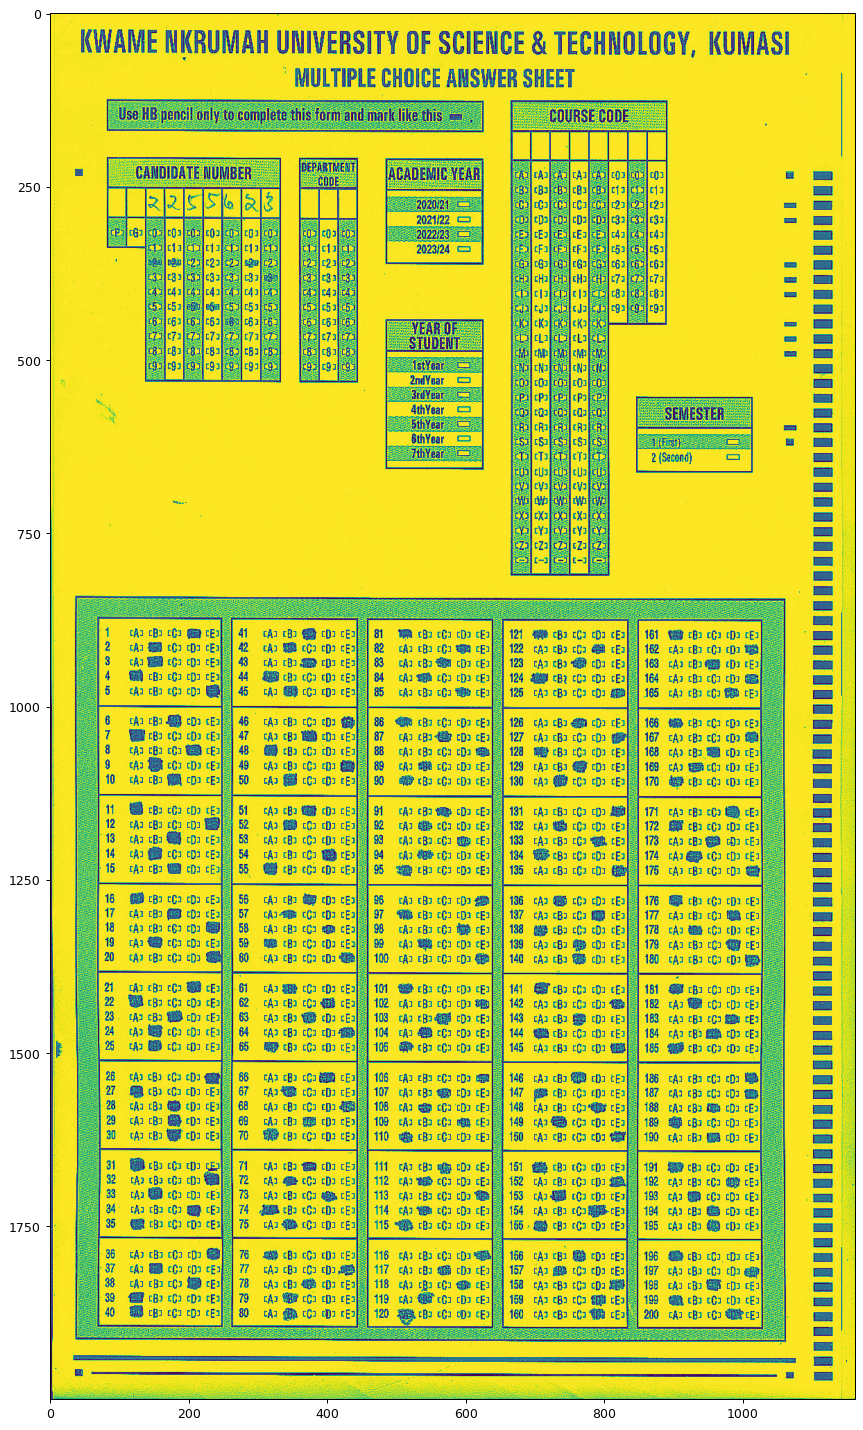

In [13]:
import numpy as np
# Apply sharpening filter
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(imgBigContour, -1, kernel)

figure(figsize=(20, 20), dpi=90)
plt.imshow(img)

In [14]:
import imutils
from imutils.perspective import four_point_transform
# cnts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
docCnt = None

# ensure that at least one contour was found
if len(cnts) > 0:
    # sort the contours according to their size in
    # descending order
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    # loop over the sorted contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if our approximated contour has four points,
        # then we can assume we have found the paper
        if len(approx) == 4:
            docCnt = approx
            break

# apply a four point perspective transform to both the
# original image and grayscale image to obtain a top-down
# birds eye view of the paper
paper = four_point_transform(img, docCnt.reshape(4, 2))
warped = four_point_transform(img, docCnt.reshape(4, 2))

# apply Otsu's thresholding method to binarize the warped
# piece of paper
thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]


# cnts = imutils.grab_contours(cnts)

(1072, 1024)

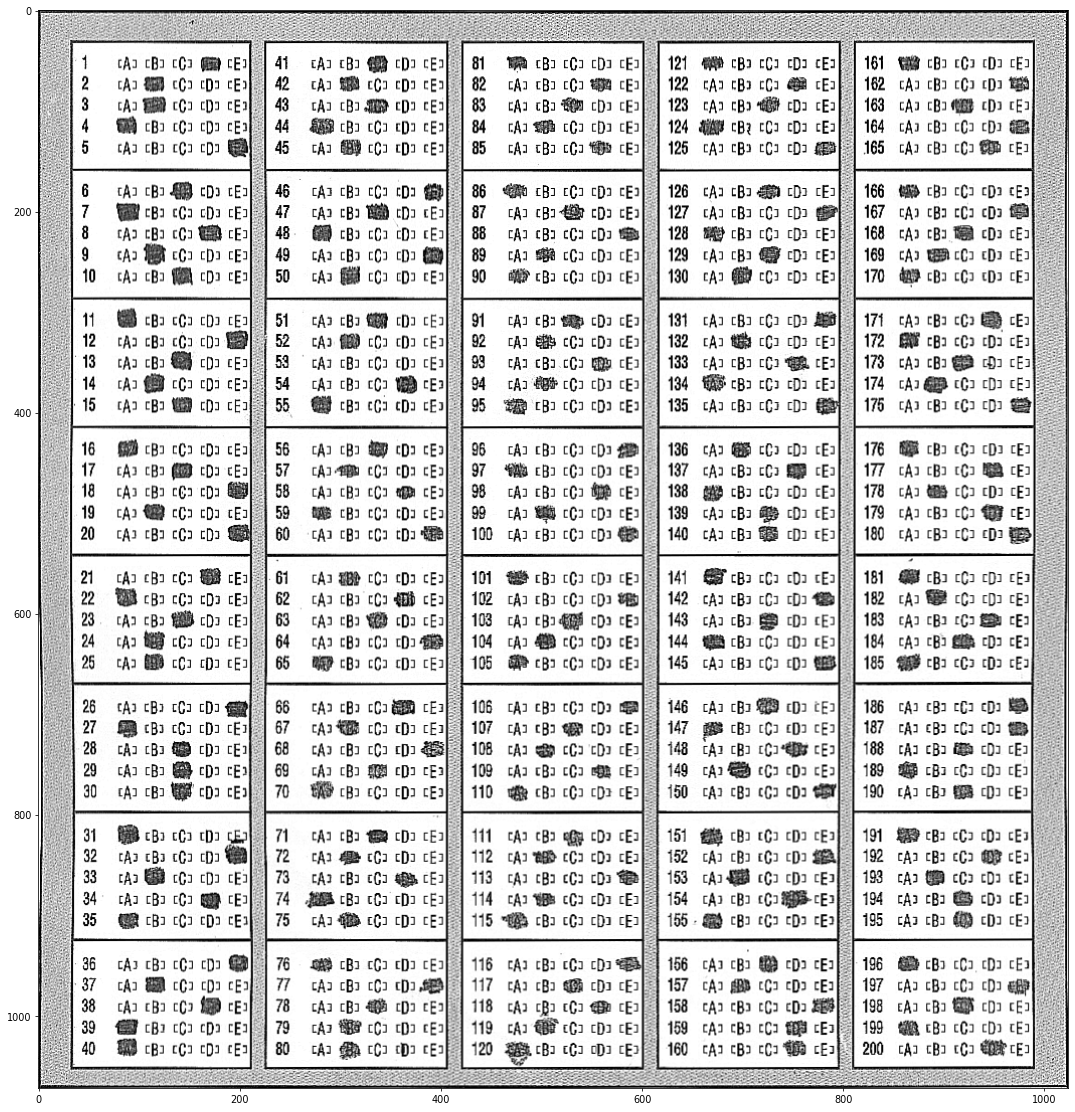

In [15]:
figure(figsize=(20, 20), dpi=70)
plt.imshow(paper, cmap='gray')   

paper.shape



In [16]:
# Resize the image just to get right of the black border
# resize = paper[30:paper.shape[0] - 20, 40:paper.shape[1] - 37]
# plt.imshow(resize)
# resize.size

In [17]:
minorCnt = cv2.findContours(paper.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(paper, minorCnt[0], -1, (0, 255, 0), 10)
figure(figsize=(20, 20), dpi=70)
# plt.imshow(paper, cmap='gray')

# Resize the image just to get right of the black border
resize = paper[40:paper.shape[0] - 25, 39:paper.shape[1] - 33]
print(resize.shape)


cv2.imshow("paper", resize)
# Wait for a keystroke.
cv2.waitKey(0)

# Close the window.
cv2.destroyAllWindows()

(1007, 952)


<Figure size 1400x1400 with 0 Axes>

## Cropping out the columns on the sheet

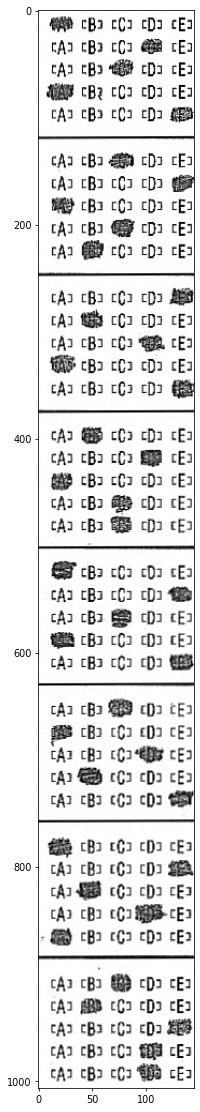

In [18]:
firstCol = resize[0:resize.shape[0], 35: 172]
secondCol = resize[0:resize.shape[0], 225: 367]
thirdCol  = resize[0:resize.shape[0], 420: 560]
fourthCol = resize[0: resize.shape[0], 610: 755]
fifthCol  = resize[0:resize.shape[0], 810: 1100]

# fourthCol = resize[0:resize.shape[0], resize.shape[1]//5*3:resize.shape[1]//5*4]


figure(figsize=(20, 20), dpi=70)
plt.imshow(fourthCol, cmap='gray')

C:\Users\jdome\AppData\Local\Temp\ipykernel_6680\419417150.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure(figsize=(10, 10), dpi=30)


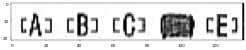

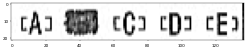

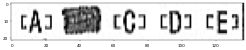

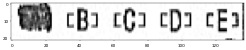

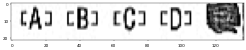

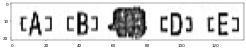

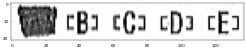

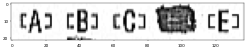

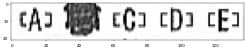

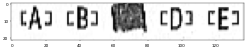

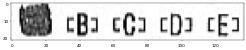

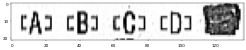

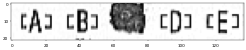

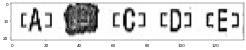

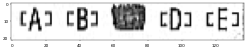

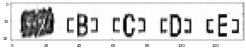

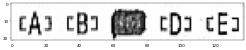

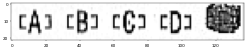

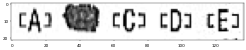

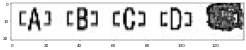

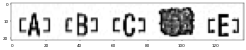

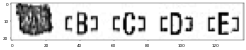

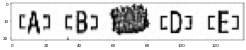

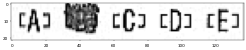

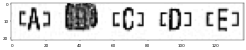

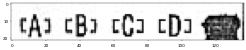

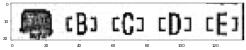

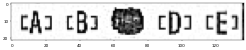

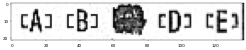

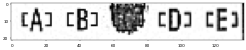

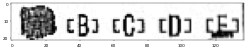

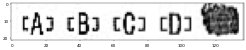

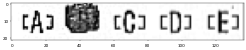

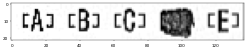

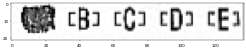

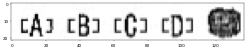

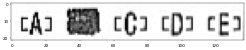

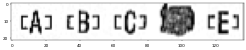

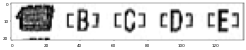

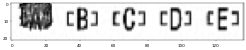

In [19]:
import os
# Create a directory to store the images.
if not os.path.exists('output'):
    os.mkdir('output')

count = 0
r_delta = 0
question = 1
for r in range(0,firstCol.shape[0],22):
    x = 22
    for c in range(0,firstCol.shape[1],200):
        figure(figsize=(10, 10), dpi=30)
        # print(r+r_delta, r+x)
        plt.imshow(firstCol[r+r_delta:r+r_delta+x, c:c+200], cmap='gray')
        cv2.imwrite(f"output/Question{question}_{c}.png",firstCol[r+r_delta:r+r_delta+x, c:c+200])
        count += 1
        question += 1
        if count % 5 == 0:
            # print(count)
            r_delta += 18
            # plt.imshow(firstCol[r+r_delta:r+r_delta+x, c:c+200], cmap='gray')
    if count == 40:
        break
        
        # print(r_delta)
        # else:
        #     x = 22
        #     print(count)
        #     firstCol[r:r+20, c:c+200] 
            # see = firstCol[r:r+17, c:c+200]
            # figure(figsize=(10, 10), dpi=70)
            # plt.imshow(see, cmap='gray')
            # break


In [20]:
# import os
# # Create a directory to store the images.
# if not os.path.exists('second'):
#     os.mkdir('second')

# for r in range(0,secondCol.shape[0],22):
#     for c in range(0,secondCol.shape[1],200):
#         cv2.imwrite(f"second/img{r}_{c}.png",secondCol[r:r+19, c:c+200])